# Overview

This notebook presents a brief tutorial on using [spdlog](https://github.com/gabime/spdlog) as the logging engine for a c++ application.

## Table of content

0. Quick preview
1. Introduction
2. Setting up `spdlog`
3. `poco` and `spdlog`
4. Advanced `spdlog` features
5. Where to go from here

Here we are using `xeus-cling` to add a `c++` kernel for the Jupyter notebook.
`spdlog` is not depeneding on either `jupyter` or `xeus-cling` and can be used in any C++ application. 

In [1]:
#pragma cling add_include_path("/home/8cz/micromamba/envs/spdlog_tutorial/include")
#pragma cling add_library_path("/home/8cz/micromamba/envs/spdlog_tutorial/lib")

In [2]:
#pragma cling load("spdlog")

In [3]:
#pragma cling add_include_path("/home/8cz/micromamba/envs/spdlog_tutorial/include/Poco")

In [4]:
!echo $LD_LIBRARY_PATH

/home/8cz/micromamba/envs/spdlog_tutorial/lib:


## 0. Quick preview

In [5]:
#include <spdlog/spdlog.h>

In [6]:
#include <spdlog/sinks/stdout_color_sinks.h>

In [7]:
spdlog::info("***Welcome to spdlog!***");

In [8]:
spdlog::error("Some error message with arg: {}", 1);

In [9]:
spdlog::critical("Support for int: {0:d};  hex: {0:x};  oct: {0:o}; bin: {0:b}", 42);

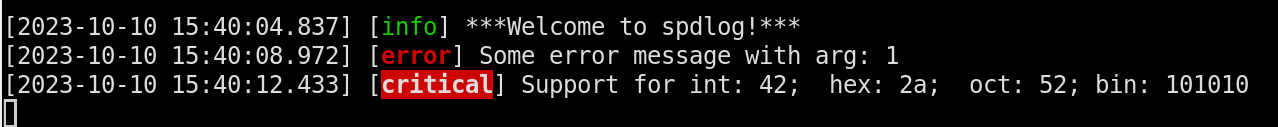

In [10]:
%%executable spdlog_quick -- -lfmt

// out-of-box support for standard logging levels
spdlog::info("***Welcome to spdlog!***");
spdlog::error("Some error message with arg: {}", 1);
spdlog::warn("Easy padding in numbers like {:08d}", 12);
spdlog::critical("Support for int: {0:d};  hex: {0:x};  oct: {0:o}; bin: {0:b}", 42);

// it also supports Python-like formatting syntax
spdlog::info("Support for floats {:03.2f}", 1.23456);
spdlog::info("Positional args are {1} {0}..", "too", "supported");
spdlog::info("{:<30}", "left aligned");

// adjustable level
spdlog::set_level(spdlog::level::debug);
spdlog::debug("This DEBUG message will be displayed..");

// customizable logger
auto console = spdlog::stdout_color_mt("console");
auto err_logger = spdlog::stderr_color_mt("stderr");
spdlog::get("console")->info("loggers can be retrieved from a global registry using the spdlog::get(logger_name)");

Writing executable to spdlog_quick


In [11]:
!./spdlog_quick

[2023-10-10 15:41:06.426] [info] ***Welcome to spdlog!***
[2023-10-10 15:41:06.426] [error] Some error message with arg: 1
[2023-10-10 15:41:06.426] [warning] Easy padding in numbers like 00000012
[2023-10-10 15:41:06.426] [critical] Support for int: 42;  hex: 2a;  oct: 52; bin: 101010
[2023-10-10 15:41:06.426] [info] Support for floats 1.23
[2023-10-10 15:41:06.426] [info] Positional args are supported too..
[2023-10-10 15:41:06.426] [info] left aligned                  
[2023-10-10 15:41:06.426] [debug] This DEBUG message will be displayed..
[2023-10-10 15:41:06.426] [console] [info] loggers can be retrieved from a global registry using the spdlog::get(logger_name)


## 1. Introduction

1.1. Why Switch to spdlog?

spdlog is a modern C++ logging library that offers high-performance and is feature-rich.
Here are some reasons why we should consider switching to spdlog:

- **Performance**: spdlog is known for its speed and **low** overhead, particularly for asynchronous logging.
- **Flexibility**: It provides a variety of logging targets, known as sinks, such as console, file, rotating file, etc.
- **User-friendly**: Its syntax is intuitive and easily configurable.
- **Actively Maintained**: spdlog has an active community, ensuring regular updates and addressing issues promptly.

1.2. Key Differences between Poco and spdlog

While both Poco and spdlog provide logging capabilities, the design principles are different.
Here are a few examples:

- **Initialization**:
  - Poco: Requires more verbose setup for logging channels.
  - spdlog: Simplified setup with easy-to-use factory functions.
  
- **Performance**:
  - Poco: Good performance, but can be slower in some scenarios.
  - spdlog: Designed for high-performance scenarios, especially with its asynchronous mode.
  
- **Syntax**:
  - Poco: Uses traditional logging syntax with different methods for levels.
  - spdlog: Uses a unified syntax with **format strings**.
  
- **Extensibility**:
  - Poco: Provides extensive features beyond logging, making it heavier but versatile.
  - spdlog: Focuses primarily on logging (single purpose).


## 2. Setting up `spdlog`

`spdlog` is a **header only** library, so there is no need to build it.
As demonstrated in this tutorial, it is available from `conda-forge` and can be easily added as a dependency to your project.

## 3. Poco and spdlog

3.1 Simple logging

`poco`

In [12]:
#include <Poco/Logger.h>
#include <Poco/ConsoleChannel.h>

In [13]:
%%executable poco_simple_logger -- -lPocoFoundation -lfmt

// Setting up Poco logger
Poco::Logger& logger = Poco::Logger::get("ExampleLogger"); // Create or get logger
logger.setChannel(new Poco::ConsoleChannel); // Set output channel
logger.setLevel(Poco::Message::PRIO_DEBUG);  // Set log level

// Simple loop
for (int i = 0; i < 5; i++) {
    logger.debug("Poco Loop iteration: " + std::to_string(i));
}

Writing executable to poco_simple_logger


In [14]:
!./poco_simple_logger

Poco Loop iteration: 0
Poco Loop iteration: 1
Poco Loop iteration: 2
Poco Loop iteration: 3
Poco Loop iteration: 4


`spdlog`

In [15]:
#include <spdlog/spdlog.h>
#include <spdlog/sinks/stdout_color_sinks.h>

> `xeus-cling` is keeping a single main file for all cells, so we need to link `poco` for the `spdlog` below.

In [16]:
%%executable spdlog_simple_logger -- -lPocoFoundation -lfmt

// Setting up spdlog logger
auto console = spdlog::stdout_color_mt("ExampleLogger"); // Create or get logger
spdlog::set_level(spdlog::level::debug); // Set log level

// Simple loop
for (int i = 0; i < 5; i++) {
    spdlog::debug("spdlog Loop iteration: {}", i);
}


Writing executable to spdlog_simple_logger


In [17]:
!./spdlog_simple_logger

[2023-10-10 15:41:23.570] [debug] spdlog Loop iteration: 0
[2023-10-10 15:41:23.570] [debug] spdlog Loop iteration: 1
[2023-10-10 15:41:23.570] [debug] spdlog Loop iteration: 2
[2023-10-10 15:41:23.570] [debug] spdlog Loop iteration: 3
[2023-10-10 15:41:23.570] [debug] spdlog Loop iteration: 4


**_Comparison_**:

- Initialization:
  - Poco: Requires setting up the logger, channel, and level separately.
  - spdlog: Offers a more streamlined setup, particularly with predefined sinks like stdout_color_mt.
- Syntax:
  - Poco: Uses string concatenation for logging messages.
  - spdlog: Uses a format string syntax (similar to Python's f-strings or printf), making it concise and more readable.
- Performance:
  - While both will handle this simple scenario with ease, in more extensive logging scenarios, spdlog might offer better performance, especially with its asynchronous logging capabilities.

3.2 With Namespace

> `xeus-cling` does not allow namespace definition within the same cell as `%%executable`, so we have to define them as global ones.

`poco`

In [18]:
#include <Poco/Logger.h>
#include <Poco/ConsoleChannel.h>
#include <string>

In [19]:
namespace namespace_a {
    void logMessage() {
        Poco::Logger& logger = Poco::Logger::get("namespace_a");
        logger.debug("This is a debug message from namespace_a");
    }
}

In [20]:
namespace namespace_b {
    void logMessage() {
        Poco::Logger& logger = Poco::Logger::get("namespace_b");
        logger.debug("This is a debug message from namespace_b");
    }
}

In [21]:
%%executable poco_multiple_loggers -- -lPocoFoundation -lfmt

Poco::Logger::root().setChannel(new Poco::ConsoleChannel);
Poco::Logger::root().setLevel(Poco::Message::PRIO_DEBUG);

namespace_a::logMessage();
namespace_b::logMessage();

Writing executable to poco_multiple_loggers


In [22]:
!./poco_multiple_loggers

This is a debug message from namespace_a
This is a debug message from namespace_b


`spdlog`

In [23]:
#include <spdlog/spdlog.h>
#include <spdlog/sinks/stdout_color_sinks.h>

In [24]:
namespace namespace_aa {
    void logMessage() {
        auto logger = spdlog::get("namespace_a");
        if (!logger) {
            logger = spdlog::stdout_color_mt("namespace_a");
        }
        logger->debug("This is a debug message from namespace_a");
    }
}

In [25]:
namespace namespace_bb {
    void logMessage() {
        auto logger = spdlog::get("namespace_b");
        if (!logger) {
            logger = spdlog::stdout_color_mt("namespace_b");
        }
        logger->debug("This is a debug message from namespace_b");
    }
}

In [26]:
%%executable spdlog_multiple_loggers -- -lPocoFoundation -lfmt

spdlog::set_level(spdlog::level::debug);

namespace_aa::logMessage();
namespace_bb::logMessage();


Writing executable to spdlog_multiple_loggers


In [27]:
!./spdlog_multiple_loggers

[2023-10-10 15:41:40.830] [namespace_a] [debug] This is a debug message from namespace_a
[2023-10-10 15:41:40.830] [namespace_b] [debug] This is a debug message from namespace_b


**_Comparison_**:

- Logger Creation:
  - Poco: Uses the Poco::Logger::get method to either retrieve an existing logger or create a new one. Logger creation is lazy (i.e., it's created when first called).
  - spdlog: Uses the spdlog::get method to retrieve a logger, and if it doesn't exist, it creates one using the spdlog::stdout_color_mt method. This approach ensures that the logger is created only once.
- Namespacing:
  For both Poco and spdlog, the logger name acts as an implicit namespace. The name can be used to differentiate loggers, making it easier to manage and filter logs from different parts of the application.
- Customization:
  - Poco: Allows for different channels, formatters, and configurations to be set per logger.
  - spdlog: Provides the ability to set different sinks, formatters, and configurations per logger.

## 4. Advanced `spdlog` features

4.1 Asynchronous Logging

`spdlog`` supports asynchronous logging to boost performance.
When logging asynchronously, log messages are pushed into a lock-free queue and are processed by a dedicated thread.

In [28]:
#include <spdlog/async.h>
#include <spdlog/sinks/stdout_color_sinks.h>

In [29]:
%%executable async_logger -- -lPocoFoundation -lfmt

// Initialize the async logger
spdlog::init_thread_pool(8192, 1);  // queue size 8192, 1 backing thread
auto async_logger = spdlog::stdout_color_mt<spdlog::async_factory>("async_logger");

async_logger->info("This is an async log message");

Writing executable to async_logger


In [30]:
!./async_logger

[2023-10-10 15:41:47.352] [async_logger] [info] This is an async log message


4.2 Rotating File Logging

With `spdlog``, you can create rotating log files.
Once a log file reaches a certain size, a new file is created.

In [31]:
#include <spdlog/sinks/rotating_file_sink.h>

In [32]:
%%executable rotating_logger -- -lPocoFoundation -lfmt

auto rotating_logger = spdlog::rotating_logger_mt("rotating_logger", "mylogfile", 1024 * 1024 * 5, 3);  // 5MB rotating log
rotating_logger->info("This will be logged to a rotating log file");

Writing executable to rotating_logger


In [33]:
!./rotating_logger

4.3 Multi-threading

`spdlog` is thread-safe and supports multi-threaded logging out of the box.


In [34]:
#include <thread>

In [35]:
%%executable thread_logger -- -lPocoFoundation -lfmt

auto logger = spdlog::stdout_color_mt("mt_logger");

std::thread t1([&](){
    logger->info("Logged from thread 1");
});

std::thread t2([&](){
    logger->info("Logged from thread 2");
});

t1.join();
t2.join();


Writing executable to thread_logger


In [36]:
!./thread_logger

[2023-10-10 15:41:56.739] [mt_logger] [info] Logged from thread 1
[2023-10-10 15:41:56.739] [mt_logger] [info] Logged from thread 2


## 5. Where to go from here

`spdlog` is a header-only library, so here are a few ways to adopt it:

- use it as a replacement for some of the logging in your existing project
- for some small module, consider using `spdlog` as a local logger, in addition to the main logger based on `poco`.
- start using it in some satelite project, and see how it goes.
